In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import metrics


$y= 5x^4 - 10x^3 - x + 10 $

In [ ]:
def calculate_y(x):
  return (5 * (x**4) - 10 * (x**3) - x + 10)

In [ ]:
def dnn_model():
  input = Input((1, ), name = 'Input-layer')
  hidden_layer1 = Dense(32, activation='relu', name='Hidden-layer1')(input)
  hidden_layer2 = Dense(64, activation='relu', name='Hidden-layer2')(hidden_layer1)
  hidden_layer3 = Dense(128, activation='relu', name='Hidden-layer3')(hidden_layer2)
  output = Dense(1, name = 'Output-layer')(hidden_layer3)
  model = Model(input, output, name = 'DNN_Model')
  return model

### A. Use three hidden layers 32, 64 and 128 and print the desired summary of the model.

In [ ]:
model = dnn_model()
model.summary()

Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input-layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer1 (Dense)           │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer2 (Dense)           │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer3 (Dense)           │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

###B. Generate the training samples and normalized it

In [ ]:
def generate_sample(number_of_sample):
  x = np.random.uniform(-20, 10, number_of_sample)
  y = calculate_y(x)
  return x, y

In [ ]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

In [ ]:
number_of_samples = 5000
x, y = generate_sample(number_of_samples)
x_normal = normalize(x)
y_normal = normalize(y)

# train dataset
X_train, y_train = x_normal[ : int(number_of_samples * 0.8)], y_normal[ : int(number_of_samples * 0.8)]

# validation dataset
X_val, y_val = x_normal[int(number_of_samples * 0.8) : int(number_of_samples * 0.9)], y_normal[int(number_of_samples * 0.8) : int(number_of_samples * 0.9)]

#test dataset
X_test, y_test = x_normal[int(number_of_samples * 0.9) : ], y_normal[int(number_of_samples * 0.9) : ]

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[metrics.R2Score(name = 'accuracy')])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: -0.4616 - loss: 0.3184 - val_accuracy: 0.9784 - val_loss: 0.0052
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0028 - val_accuracy: 0.9951 - val_loss: 0.0012
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 5.9094e-04 - val_accuracy: 0.9987 - val_loss: 3.0419e-04
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 1.8694e-04 - val_accuracy: 0.9995 - val_loss: 1.3221e-04
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 1.2970e-04 - val_accuracy: 0.9993 - val_loss: 1.6263e-04
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9997 - loss: 6.6856e-05 - val_accuracy: 0.9997 - val_loss: 7.3099e-05
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 3.9252e-05 - val_accuracy: 0.9999 - val_loss: 2.7816e-05
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9999 - loss: 1.4184e-05 


In [ ]:
print(f"Test loss : {test_loss}")
print(f"Test accuracy : {test_accuracy * 100}")

Test loss : 1.489061105530709e-05
Test accuracy : 99.99406933784485


In [ ]:
y_prediction = model.predict(X_test[0 : 10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
print('y actual \t\t\t  y prediction')
print("======================================================")

for i in range(0, 10):
  print(f"{y_test[i]} \t\t\t {y_prediction[i]}")

y actual 			  y prediction
-0.18486923132986544 			 [-0.18313272]
-0.9960375737989328 			 [-0.9990128]
-0.2514739393546309 			 [-0.24971952]
-0.8176656614860994 			 [-0.8174254]
-0.9952427720365477 			 [-0.9969485]
-0.9174317809091127 			 [-0.9302498]
0.25923132247256975 			 [0.25972903]
-0.1999417768598506 			 [-0.19836114]
-0.9906597152444003 			 [-0.9925089]
-0.9987639759108097 			 [-1.001923]


In [ ]:
history = history.history

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


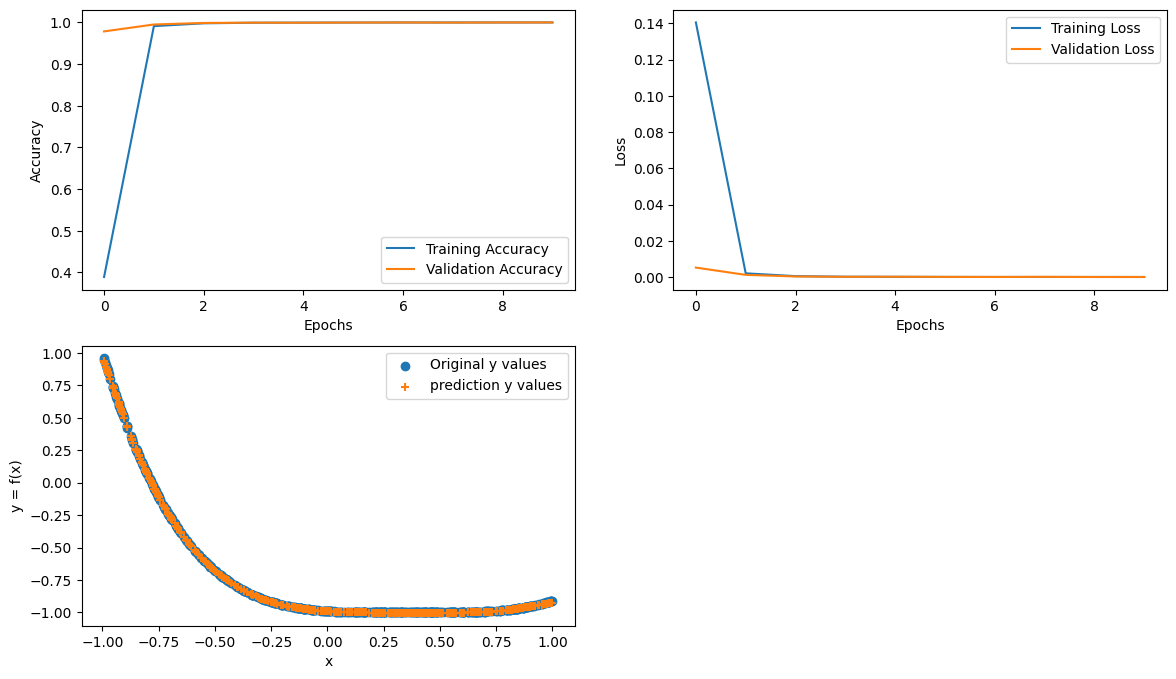

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.subplot(2, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])


y_prediction = model.predict(X_test)
plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, marker = 'o')
plt.scatter(X_test, y_prediction, marker = '+')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend(['Original y values', 'prediction y values'])